# Lab 2: Códigos Cíclicos

Alunos: Fernando Zanchitta e Guilherme Kowalczuk

# 1. Simulação

In [3]:
from channel import BSC
from encoder import NaiveEncoder, ConvolutionalEncoder
from lab1 import Simulator
from helpers import safe_load

import numpy as np
import random
random.seed(2023)

p = [5e-1, 2e-1, 1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 2e-5, 1e-5]

## 1.1. Naive Encoder

In [2]:
k = 4
l = 1000000//k
naive_encoder = NaiveEncoder()

channels = map(BSC, p)
sim = map(lambda channel: Simulator(naive_encoder, channel, k=k, l=l), channels)
simulated = zip(p, map(Simulator.simulate, sim))
naive_sim = safe_load('lab3_values/naive.pickle', lambda: list(simulated))

print(naive_sim)

[(0.5, 0.500831), (0.2, 0.199307), (0.1, 0.100258), (0.05, 0.050281), (0.02, 0.020018), (0.01, 0.009992), (0.005, 0.004897), (0.002, 0.001971), (0.001, 0.001009), (0.0005, 0.000483), (0.0002, 0.000207), (0.0001, 0.000105), (5e-05, 4.1e-05), (2e-05, 2e-05), (1e-05, 1.2e-05)]


## 1.2. Convolutional Encoder

In [4]:
def simulate_convolutional(m,G,k=None):
    n = 3
    conv_encoder = ConvolutionalEncoder(n, m, G)

    conv_sim = []
    for prob in p:
        if k is None:
            sim_k = int(8000/prob) # min(int(8000/prob), 1_000_000)
        else:
            sim_k = k
        channel = BSC(prob)
        sim = Simulator(conv_encoder, channel, k=sim_k, l=1)
        simulated = sim.simulate()
        conv_sim.append(simulated)

    return list(zip(p, conv_sim))

mG = [
    (3, np.array([[1,0,1,1], [1,1,0,1], [1,1,1,1]])),
    (4, np.array([[1,0,1,0,1], [1,1,0,1,1], [1,1,1,1,1]])), 
    (6, np.array([[1,0,0,1,1,1,1], [1,0,1,0,1,1,1], [1,1,0,1,1,0,1]])),
]

conv_sim = []
for m,G in mG:
    sim = safe_load(f'lab3_values/conv{m}.pickle', lambda: simulate_convolutional(m,G))
    conv_sim.append(sim)
    print(f'm={m}')
    print(sim)

m=3
[(0.5, 0.505), (0.2, 0.206), (0.1, 0.003), (0.05, 0.0), (0.02, 0.0), (0.01, 0.0), (0.005, 0.0), (0.002, 0.0), (0.001, 0.0), (0.0005, 0.0), (0.0002, 0.0), (0.0001, 0.0), (5e-05, 0.0), (2e-05, 0.0), (1e-05, 0.0)]


 33%|███▎      | 52766/160000 [00:19<00:40, 2632.66it/s]

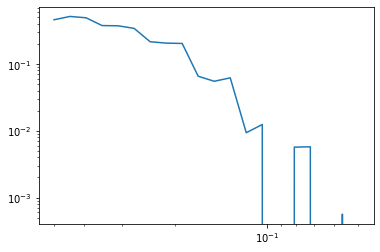

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.gca()
# plt.plot(p, naive_sim)
plt.plot([k for k,_ in conv_sim[0]], [v for _,v in conv_sim[0]])
ax.set_yscale('log')
ax.set_xscale('log')
ax.invert_xaxis()

SyntaxError: can't use starred expression here (2771073961.py, line 1)

[(0.5, 0.46),
 (0.4429333952050413, 0.5155555555555555),
 (0.39237998517573064, 0.4921259842519685),
 (0.3475963980887803, 0.37630662020905925),
 (0.30792410553301314, 0.3734567901234568),
 (0.27277973905842595, 0.34153005464480873),
 (0.2416465119285877, 0.21549636803874092),
 (0.2140666199359697, 0.20556745182012848),
 (0.18963450953661246, 0.2030360531309298),
 (0.1679909143141891, 0.06554621848739496),
 (0.14881757208156593, 0.05514157973174367),
 (0.1318325449365179, 0.06200527704485488),
 (0.1167860734545061, 0.009345794392523364),
 (0.1034569040557395, 0.012422360248447204),
 (0.09164903554162182, 0.0),
 (0.08118883695943607, 0.005686433793663688),
 (0.07192249441438314, 0.0057553956834532375),
 (0.06371374928515669, 0.0),
 (0.056441894584234466, 0.000564652738565782),
 (0.049999999999999996, 0.0)]